<a href="https://colab.research.google.com/github/srilav/audioml/blob/master/MiniProject_4_Emotion_Classification_from_Speech_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Speech Emotion Classification

## Problem Statement

Build a model to recognize emotion from speech using Ensemble learning 

## Learning Objectives

At the end of the mini-project, you will be able to :

* extract the features from audio data
* implement ML classification algorithms individually and as Ensembles, to classify emotions
* record the voice sample and test it with trained model

## Dataset

**TESS Dataset**

The first dataset chosen for this mini-project is the [TESS](https://dataverse.scholarsportal.info/dataset.xhtml?persistentId=doi:10.5683/SP2/E8H2MF) (Toronto emotional speech set) dataset. It contains 2880 files.  A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses and the sets were recorded in seven different emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). Both actresses spoke English as their first language, were university educated, and had musical training. Audiometric testing indicated that both actresses had thresholds within the normal range.

**Ravdess Dataset**

The second dataset chosen for this mini-project is [Ravdess](https://zenodo.org/record/1188976#.YLczy4XivIU) (The Ryerson Audio-Visual Database of Emotional Speech and Song). This dataset contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

**Filename identifiers**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: `03-01-06-01-02-01-12.wav`

    - Audio-only - 03
    - Speech - 01
    - Fearful - 06
    - Normal intensity - 01
    - Statement "dogs" - 02
    - 1st Repetition - 01
    - 12th Actor - 12 Female, as the actor ID number is even.

## Information

**Speech Emotion Recognition (SER)** is the task of recognizing the emotion from  speech, irrespective of the semantics. Humans can efficiently perform this task as a natural part of speech communication, however, the ability to conduct it automatically using programmable devices is a field of active research.

Studies of automatic emotion recognition systems aim to create efficient, real-time methods of detecting the emotions of mobile phone users, call center operators and customers, car drivers, pilots, and many other human-machine communication users. Adding emotions to machines forms an important aspect of making machines appear and act in a human-like manner

Lets gain familiarity with some of the audio based features that are commonly used for SER. 

**Mel scale** — The mel scale (derived from the word *melody*) is a perceptual scale of pitches judged by listeners to be equal in distance from one another. The reference point between this scale and normal frequency measurement is defined by assigning a perceptual pitch of 1000 mels to a 1000 Hz tone, 40 dB above the listener's threshold. Above about 500 Hz, increasingly large intervals are judged by listeners to produce equal pitch increments. Refer [here](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8) for more detailed information.

**Pitch** — how high or low a sound is. It depends on frequency, higher pitch is high frequency

**Frequency** — speed of vibration of sound, measures wave cycles per second

**Chroma** — Representation for audio where spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma). Computed by summing the log frequency magnitude spectrum across octaves.

**Fourier Transforms** — used to convert from time domain to frequency domain. Time domain shows how signal changes over time. Frequency domain shows how much of the signal lies within each given frequency band over a range of frequencies

**Librosa**

[Librosa](https://librosa.org/doc/latest/index.html) is a Python package, built for speech and audio analytics. It provides modular functions that simplify working with audio data and help in achieving a wide range of applications such as identification of the personal characteristics of different individuals' voice samples, detecting emotions from audio samples etc. 

For further details on the Librosa package, refer [here](https://conference.scipy.org/proceedings/scipy2015/pdfs/brian_mcfee.pdf).


## Grading = 10 Points

In [ ]:
# Install packages
!pip -qq install librosa soundfile
!pip -qq install wavio
print("Libraries Installed successfully!")

Libraries Installed successfully!


In [ ]:
import os,random
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
main_path = "/content/gdrive/MyDrive/ML-Projects/Emotion-Classification/M4_MP4_Ravdess_Tess"

In [ ]:
TESS = os.path.join(main_path, "Tess/")
RAV = os.path.join(main_path, "ravdess/")

### Import Neccesary Packages

In [ ]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import IPython.display as ipd
from matplotlib import pyplot as plt
from datetime import datetime
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
import warnings
warnings.filterwarnings('ignore')
import re
import seaborn as sns
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Work-Flow

* Load the TESS audio data and extract features and labels

* Load the Ravdess audio data and extract features

* Combine both the audio dataset features

* Train and test the model with TESS + Ravdess Data

* Record the team audio samples and add them to TESS + Ravdess data

* Train and test the model with TESS + Ravdess + Team Recorded (combined) data

* Test each of the models with live audio sample recording.

### Load the Tess data and Ravdess data audio files (1 point)

Hint: `glob.glob`

In [ ]:
# YOUR CODE HERE
#directories of datasets
tess_data_dir = TESS
ravdess_data_dir = RAV

tess_files = glob.glob(tess_data_dir + "/*/*.wav")
ravdess_files = glob.glob(ravdess_data_dir + "/*/*.wav")
print(f'Number of Tess dataset audios files : {len(tess_files)}')
print(f'Number of Ravdess Dataset audios files : {len(ravdess_files)}')

Number of Tess dataset audios files : 2679
Number of Ravdess Dataset audios files : 1188


#### Play the sample audio

In [ ]:
# YOUR CODE HERE
ipd.Audio(random.choice(tess_files))

In [ ]:
ipd.Audio(random.choice(ravdess_files))

### Data Exploration and Visualization (1 points)

#### Visualize the distribution of all the labels

In [ ]:
def parse_ravdess_files():
  # path to the ravdess directory
  ravdess_dir_list = os.listdir(ravdess_data_dir)
  ravdess_dir_list.sort()

  ravdess_emotion = []
  ravdess_gender = []
  ravdess_path = []
  for i in ravdess_dir_list:
    fname = os.listdir(ravdess_data_dir + i)
    for f in fname:
      part = re.split('-|_', f.split('.')[0]) 
      ravdess_emotion.append(part[7])
      temp = int(part[6])
      if temp%2 == 0:
        temp = "female"
      else:
        temp = "male"
      ravdess_gender.append(temp)
      ravdess_path.append(ravdess_data_dir + i + '/' + f) 
  
  return ravdess_emotion, ravdess_path, ravdess_gender

In [ ]:
r_emotion, r_path, r_gender = parse_ravdess_files()
RAVDESS_df = pd.DataFrame(r_emotion)
RAVDESS_df = pd.concat([pd.DataFrame(r_gender),RAVDESS_df],axis=1)
RAVDESS_df.columns = ['gender','emotion']
RAVDESS_df['labels'] = RAVDESS_df['gender'] + ' ' + RAVDESS_df['emotion']
RAVDESS_df['source'] = 'RAVDESS' 
RAVDESS_df = pd.concat([RAVDESS_df,pd.DataFrame(r_path, columns = ['path'])],axis=1)
RAVDESS_df = RAVDESS_df.drop(['gender', 'emotion'], axis=1)
RAVDESS_df.labels.value_counts()


female sad              94
female fear             92
female disgust          92
male surprised          92
male angry              91
male fear               90
female surprised        90
male sad                89
female happy            89
female angry            88
male disgust            88
male happy              85
male neutral            45
female neutral          43
female surprised (1)     3
female happy (1)         3
male sad (1)             3
male surprised (1)       3
female angry (1)         2
female disgust (1)       1
male fear (1)            1
male disgust (1)         1
female neutral (1)       1
male happy (1)           1
male angry (1)           1
Name: labels, dtype: int64

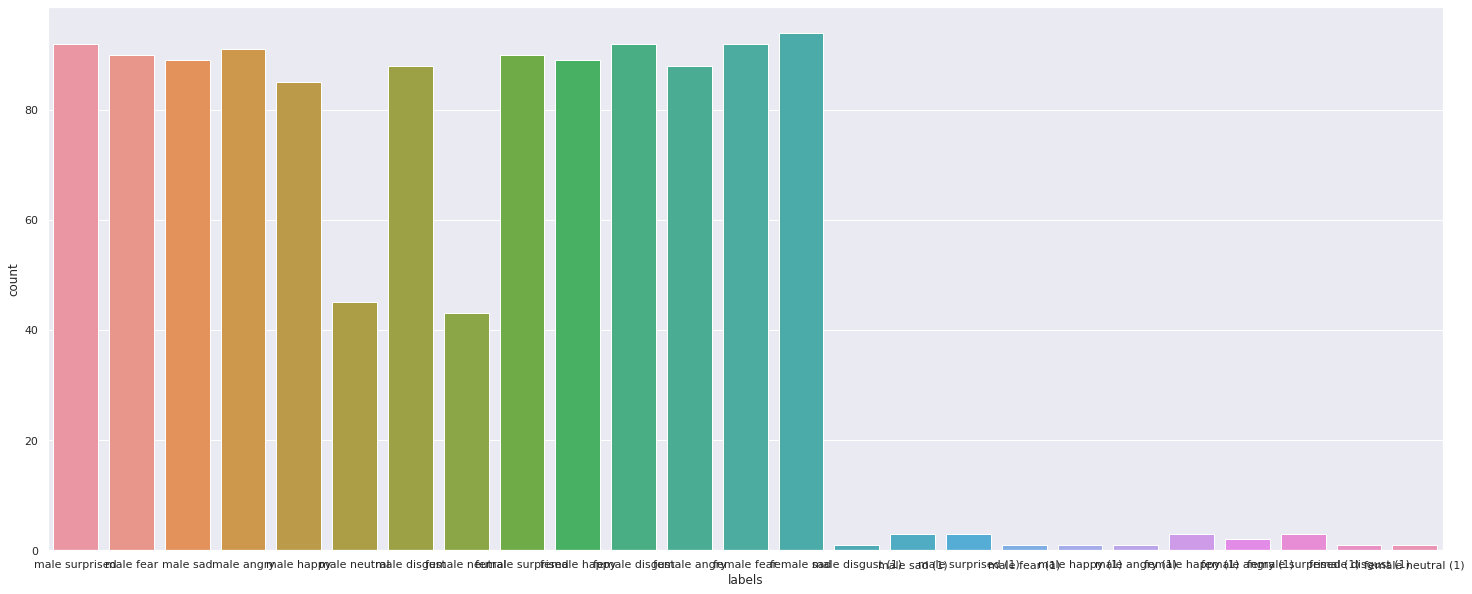

In [ ]:
# YOUR CODE HERE
sns.set(rc={'figure.figsize':(25,10)})
sns.countplot(x="labels", data=RAVDESS_df)

In [ ]:
# path to the tess directory
tess_dir_list = os.listdir(tess_data_dir)
tess_dir_list.sort()

actress = []
phrase = []
tess_emotion = []
path = []
for i in tess_dir_list:
  fname = os.listdir(tess_data_dir + i)
  for f in fname:
    part = re.split('_', f.split('.')[0]) 
    actress.append(part[0])
    tess_emotion.append(part[2])
    phrase.append(part[1])
    path.append(tess_data_dir + i + '/' + f)

        
TESS_df = pd.DataFrame(tess_emotion)
TESS_df = pd.concat([pd.DataFrame(actress),TESS_df],axis=1)
TESS_df = pd.concat([pd.DataFrame(phrase),TESS_df],axis=1)
TESS_df.columns = ['phrase', 'actress','emotion']
TESS_df.emotion.value_counts() #TESS_df.labels.value_counts()

disgust      391
surprised    387
happy        383
angry        382
sad          379
fear         379
neutral      378
Name: emotion, dtype: int64

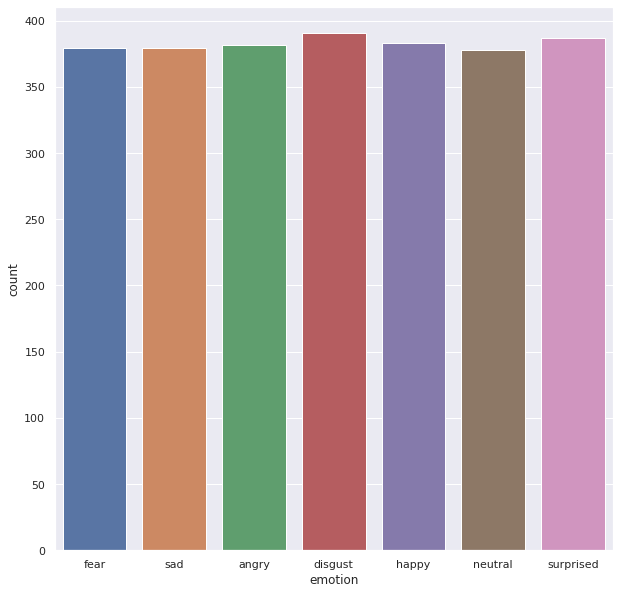

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(x="emotion", data=TESS_df)

#### Visualize sample audio signal using librosa

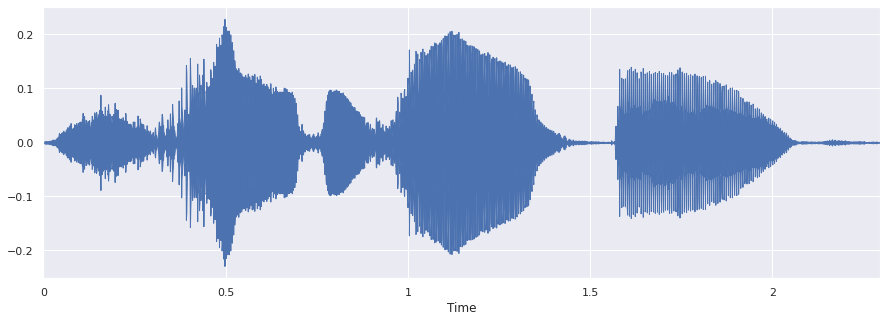

In [ ]:
# YOUR CODE HERE
# Sample
sample_audio_path = random.choice(tess_files)

# librosa is used for analyzing and extracting features of an audio signal
data, sampling_rate = librosa.load(sample_audio_path)
plt.figure(figsize=(15, 5))

# librosa.display.waveplot is used to plot waveform of amplitude vs time
librosa.display.waveplot(data, sr=sampling_rate)
plt.show()

### Feature extraction (2 points)

Read one WAV file at a time using `Librosa`. An audio time series in the form of a 1-dimensional array for mono or 2-dimensional array for stereo, along with time sampling rate (which defines the length of the array), where the elements within each of the arrays represent the amplitude of the sound waves is returned by `librosa.load()` function. Refer to the supplementary notebook ('Audio feature extraction')

To know more about Librosa, explore the [link](https://librosa.org/doc/latest/feature.html)

In [ ]:
# YOUR CODE HERE
import numba
from numba import jit
@jit(nopython=False, parallel=True)
def extract_feature(file_name, mfcc=True, chroma=True, mel=True):
  X,sample_rate = librosa.load(file_name)
  result=np.array([])
  # STFT = short-term fourier transformation
  if chroma:
    stft=np.abs(librosa.stft(X))
  # MFCC = Mel-frequency Cepstral coefficients
  if mfcc:
    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    result=np.hstack((result, mfccs))
  # Compute a chromogram from a waveform or power spectogram
  if chroma:
    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result=np.hstack((result, chroma))
  # Compute a mel-scaled spectrogram
  if mel:
    mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    result=np.hstack((result, mel))
  return result

#### Create a dictionary or a function to encode the emotions

In [ ]:
emotions={'neutral':1, 'calm':2, 'happy':3, 'sad':4, 'angry':5, 'fearful':6, 'disgust':7, 'surprised': 8}


#### TESS data feature extraction


In [ ]:
def load_tess():
  features, labels = [],[]
  for file in tess_files:
    file_name = os.path.basename(file)
    part = re.split('_', file_name.split('.')[0])
    emotion_word = part[2]
    emotion_index = emotions[emotion_word]
    feature = extract_feature(file)
    features.append(feature)
    labels.append(emotion_index)
  
  return features, labels
  

#### Ravdess data feature extraction

In [ ]:
# YOUR CODE HERE
def load_rav():
  features, labels = [],[]
  for file in ravdess_files:
    file_name = os.path.basename(file)
    emotion = file_name.split("-")[2]
    feature = extract_feature(file)
    features.append(feature)
    labels.append(emotion)
    
  #Printing the feature and labels length
  return features, labels

#### Save the features

It is best advised to save the features in dataframe and maintain so that feature extraction step is not required to be performed every time.

* Make a DataFrame with features and labels

* Write dataframe into `.CSV` file and save it offline.

In [ ]:
# YOUR CODE HERE
RAV_features, RAV_labels = load_rav()

In [ ]:
TESS_features, TESS_labels = load_tess()

In [ ]:
Merged_X = RAV_features + TESS_features
Merged_y = RAV_labels + TESS_labels

#### Split the data into train and test

In [ ]:
# YOUR CODE HERE
Merge_X_train, Merge_X_test, Merge_y_train, Merge_y_test = train_test_split(np.array(Merged_X), Merged_y, test_size=0.15, random_state=9)


In [ ]:
print((Merge_X_train.shape[0], Merge_X_test.shape[0]))


(3093, 774)


In [ ]:
print(f'Features extracted: {Merge_X_train.shape[1]}')


Features extracted: 180


### Train the model with TESS + Ravdess data (2 points)

* Apply different ML algorithms (eg. DecisionTree, RandomForest, etc.) and find the model with best performance

In [ ]:
# YOUR CODE HERE
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.base import clone

In [ ]:
# First tree without restrictions
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(Merge_X_train, Merge_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
# Second tree with hyperparameters
tree_clf2 = DecisionTreeClassifier(max_depth=20, min_samples_leaf=1, min_samples_split = 2, random_state=2)
tree_clf2.fit(Merge_X_train, Merge_y_train)
tree_clf2_y_pred = tree_clf2.predict(Merge_X_test)
print(tree_clf2.__class__.__name__, accuracy_score(Merge_y_test, tree_clf2_y_pred))

DecisionTreeClassifier 0.7366609294320138


In [ ]:
# Instantiate LogisticRegression, KNN, SVC and Random Forest Classifier
log_clf = LogisticRegression()
knn_clf = KNN()
svm_clf = SVC(probability= True)
poly_kernel_svm_clf = Pipeline([
                                ("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5, probability=True))
                      ])
rf_clf = RandomForestClassifier(random_state=2)
#classifiers = [('lr', log_clf), ('knn', knn_clf), ('kernel svc', poly_kernel_svm_clf), ('rf', rf_clf)]
classifiers = [('kernel svc', poly_kernel_svm_clf), ('rf', rf_clf)]

for clf in (log_clf, knn_clf, poly_kernel_svm_clf, rf_clf):
    clf.fit(Merge_X_train, Merge_y_train)
    Merge_y_pred = clf.predict(Merge_X_test)
    print(clf.__class__.__name__, accuracy_score(Merge_y_test, Merge_y_pred))

LogisticRegression 0.7803617571059431
KNeighborsClassifier 0.7997416020671835
Pipeline 0.8333333333333334
RandomForestClassifier 0.8397932816537468


In [ ]:
cross_val_score(poly_kernel_svm_clf, Merge_X_train, Merge_y_train, cv=8, scoring="accuracy")

array([0.86374696, 0.86861314, 0.85644769, 0.8783455 , 0.87104623,
       0.8783455 , 0.86341463, 0.86097561])

In [ ]:
cross_val_score(rf_clf, Merge_X_train, Merge_y_train, cv=3, scoring="accuracy")

array([0.84124088, 0.856621  , 0.86392694])

#### Apply the voting classifier

In [ ]:
# YOUR CODE HERE
voting_clf = VotingClassifier(estimators= classifiers, voting='soft')
voting_clf.fit(Merge_X_train, Merge_y_train)
Merge_y_pred = voting_clf.predict(Merge_X_test)
print(voting_clf.__class__.__name__, accuracy_score(Merge_y_test, Merge_y_pred))

VotingClassifier 0.8519793459552496


### Train the model with TESS + Ravdess + Team recorded data (4 points)

* Record the audio samples (team data), extract features and combine with TESS + Ravdess data features
  - Record and gather all the team data samples with proper naming convention in separate folder

    **Hint:** Follow the supplementary notebook to record team data

  - Each team member must record 2 samples for each emotion (Use similar sentences as given in TESS data)

* Train the different ML algorithms and find the model with best performance

#### Load the team data

In [ ]:
# YOUR CODE HERE
TEAM = os.path.join(main_path, "Group3/")
team_data_dir = TEAM

team_files = glob.glob(team_data_dir + "/*/*.wav")
print(f'Number of Group3 dataset audios files : {len(team_files)}')

Number of Group3 dataset audios files : 17


In [ ]:
print(team_files)

['/content/gdrive/MyDrive/ML-Projects/Emotion-Classification/M4_MP4_Ravdess_Tess/Group3/Divya/YAF_chocolate_Happy.wav', '/content/gdrive/MyDrive/ML-Projects/Emotion-Classification/M4_MP4_Ravdess_Tess/Group3/Divya/YAF_pen_calm.wav', '/content/gdrive/MyDrive/ML-Projects/Emotion-Classification/M4_MP4_Ravdess_Tess/Group3/Deepa/YAF_Traitor_Angry.wav', '/content/gdrive/MyDrive/ML-Projects/Emotion-Classification/M4_MP4_Ravdess_Tess/Group3/Deepa/YAF_Play_Happy.wav', '/content/gdrive/MyDrive/ML-Projects/Emotion-Classification/M4_MP4_Ravdess_Tess/Group3/Deepa/YAF_Bye_Sad.wav', '/content/gdrive/MyDrive/ML-Projects/Emotion-Classification/M4_MP4_Ravdess_Tess/Group3/urmila/YAF_King_surprised.wav', '/content/gdrive/MyDrive/ML-Projects/Emotion-Classification/M4_MP4_Ravdess_Tess/Group3/urmila/YAF_Soup_surprised.wav', '/content/gdrive/MyDrive/ML-Projects/Emotion-Classification/M4_MP4_Ravdess_Tess/Group3/urmila/YAF_King_neutral.wav', '/content/gdrive/MyDrive/ML-Projects/Emotion-Classification/M4_MP4_Ravd

#### Extracting features of team data and combine with TESS + Ravdess

In [ ]:
# YOUR CODE HERE
def load_team():
  features, labels = [],[]
  for file in team_files:
    file_name = os.path.basename(file)
    part = re.split('_', file_name.split('.')[0])
    emotion_word = part[2].lower()
    emotion_index = emotions[emotion_word]
    feature = extract_feature(file)
    features.append(feature)
    labels.append(emotion_index)
  
  return features, labels

In [ ]:
team_features, team_labels = load_team()

KeyError: ignored

#### Train the different ML algorithms

In [ ]:
# YOUR CODE HERE

#### Test the best working model with live audio recording

In [ ]:
# choose the best working model and assign below
MODEL = 

### Report Analysis

- Report the accuracy for 10 live samples using the model trained on TESS+Ravdess+Team data
- Discuss with the team mentor regarding deep learnt audio features (which will be introduced in Module 5 for another audio classification task). Read a related article [here](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8805181).


In [ ]:
kaggle_files = glob.glob("/content/kaggle_data/*.wav")


In [ ]:
def load_kaggle_data():
  k_features, k_file_ids = [],[]
  for file in kaggle_files:
    file_name = os.path.basename(file)
    id = file.split('/')[-1][:-4]
    k_file_ids.append(id)
    feature = extract_feature(file)
    k_features.append(feature)
    
  return k_features, k_file_ids

In [ ]:
kaggle_features, file_ids = load_kaggle_data()

In [ ]:
print(emotions)

{'neutral': 1, 'happy': 2, 'sad': 3, 'angry': 4, 'fear': 5, 'disgust': 6, 'surprised': 7}


In [ ]:
emotions_dict = {}
for emo in emotions.keys():
  val = emotions[emo]
  emotions_dict[val] = emo

print(emotions_dict)

{1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}


In [ ]:
y_pred_kaggle = voting_clf.predict(kaggle_features)
print (y_pred_kaggle)

['05' '06' '08' '1' '04' '07' '08' '03' '1' '05' '07' '06' '5' '07' '5'
 '3' '4' '7' '1' '07' '06' '1' '4' '1' '2' '06' '5' '5' '5' '7' '4' '3'
 '3' '1' '1' '2' '1' '01' '1' '07' '4' '05' '06' '4' '1' '4' '2' '7' '7'
 '2' '6' '6' '08' '01' '6' '05' '07' '04' '03' '06' '1' '3' '03' '6' '1'
 '4' '04' '5' '07' '06' '4' '2' '03' '5' '07' '7' '1' '07' '3' '01' '7'
 '1' '07' '5' '04' '03' '07' '08' '5' '6' '08' '2' '05' '05' '3' '3' '05'
 '2' '05' '2' '1' '04' '08' '2' '2' '03' '07' '04' '5' '5' '2' '05' '04'
 '4' '5' '4' '06' '5' '03' '1' '07' '07' '3' '7' '01' '3' '3' '5' '5' '05'
 '03' '7' '2' '3' '3' '4' '08' '3' '1' '1' '4' '3' '5' '05' '01' '2' '3'
 '05' '7' '2' '7' '3' '04' '7' '03' '07' '4' '2' '4' '5' '08' '4' '6' '5'
 '3' '5' '06' '3' '1' '1' '2' '3' '08' '04' '1' '06' '4' '08' '2' '7' '4'
 '6' '3' '08' '1' '6' '04' '04' '7' '6' '3' '06' '03' '5' '08' '07' '5'
 '01' '04' '07' '4']


In [ ]:
result_set = []

kaggle_df = pd.DataFrame()
kaggle_df["Id"] = file_ids

for file_id, pred in zip(file_ids, y_pred_kaggle):
  pred_string = emotions_dict[int(pred)]
  result_set.append(pred_string)

kaggle_df["Label"] = result_set

kaggle_df.to_csv('Sample_Submission.csv', index=False)